In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from multipolar import de_groot_models

import numpy as np
from matplotlib import colors
import seaborn as sns

# 1. Create a network

In [2]:
## Create random graph with 3 modules
G = nx.planted_partition_graph(
    l=3,
    k=100,
    p_in=0.03,
    p_out=0.001,
    seed=0 ## To fix output. Change to generate different random graphs.
    )
## Use connected component
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

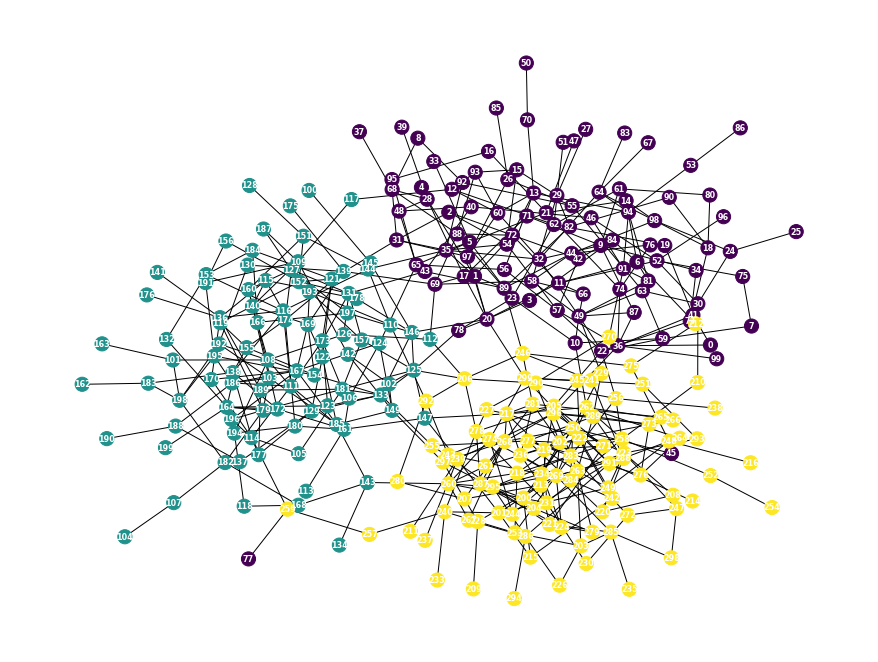

In [3]:
## Plot graph
nodelist = list(G)
node_colors = [G.nodes[n]["block"] for n in nodelist]

plt.figure(figsize=(8*1.5,6*1.5))
nx.draw(G, 
        pos=nx.kamada_kawai_layout(G),
        node_size=200,
        node_color=node_colors,
        cmap="viridis",
        with_labels=True,
        font_color="w",
        font_weight="bold",
        font_size=8)

# 2. Create a tripolar elite with poles A, B and C

In [4]:
## Assign some nodes to the elite
elite = {
    "A":[166,192],
    "B":[71,53,83],
    "C": [283]
}
## Assign numerical labels to the opinion poles
poles_corresp = {
    "A":0,
    "B":1,
    "C":2
}
## Build dictionary of coordinates for elite nodes and list of elite nodes
elite_dct, elite_nodes, poles_coord = de_groot_models.assign_poles_to_nodes(poles_corresp,elite)
## Show dictionary with coordinates of elite nodes
## These coordinates are obtained using de_groot_models.get_simplex_vertex(D) with D
## the number of dimensions, which for a system with n poles is n-1 (for n=3, we have D=2 dimensions).
elite_dct,elite_nodes,poles_coord

({166: array([1., 0.]),
  192: array([1., 0.]),
  71: array([-0.5      ,  0.8660254]),
  53: array([-0.5      ,  0.8660254]),
  83: array([-0.5      ,  0.8660254]),
  283: array([-0.5      , -0.8660254])},
 [166, 192, 71, 53, 83, 283],
 {'A': array([1., 0.]),
  'B': array([-0.5      ,  0.8660254]),
  'C': array([-0.5      , -0.8660254])})

# 3. Compute the elite-connected subgraph

In [5]:
G_econ = de_groot_models.get_elite_connected(G, elite_nodes, max_path_len=10)
## Show size of elite-connected network and of the original network (for an undirected network they must be the same)
G_econ.order(), G.order()

calculando las conexiones...
0 16
1 78
2 190
3 263
4 287
5 287
6 287
7 287
8 287
9 287


(287, 287)

# 4. Compute opinions of listeners

In [6]:
## Fix ordering of the nodes so that we know to which node does each opinion correspond
nodes_order= list(G_econ)
order_dict= dict([ (v,i) for i,v in enumerate(nodes_order) ])
## Compute opinions using the modified DeGroot model with stubborn elite nodes (Friedkin-Johnsen model)
degroot = de_groot_models.solve_model_Ax_iterative(
                G_econ,
                elite_dct,
                nodes_order = nodes_order,
                order_dict = order_dict,
                tol = 1e-3
            )

Building adjacency matrix...
Initializing the model...
Solving polarization model with the iterative Ax method
0 inf
1 5.28248409100247
2 3.9339559517841742
3 3.6322391392573814
4 3.2906689040979744
5 3.1203177929866017
6 2.835541666751568
7 2.7308957317881175
8 2.513685418628
9 2.4166191626782187
10 2.2471771084161944
11 2.151413900512974
12 2.014630688313223
13 1.9226394338214488
14 1.8078981398463423
15 1.7214949123073235
16 1.6235535444389626
17 1.5441636734951971
18 1.4586996777598655
19 1.386336991934015
20 1.3115609490012667
21 1.2454170424238404
22 1.1798787209611636
23 1.1198163171032878
24 1.0614570151210407
25 1.007588332124119
26 0.9552591767797851
27 0.9070041755552563
28 0.8602911797716698
29 0.8171360387544542
30 0.7754436318947562
31 0.7368291820233362
32 0.6996166067298633
33 0.6652205278243599
34 0.6319492223433615
35 0.6011570578764501
36 0.5716394005151022
37 0.54418239568257
38 0.5184400675643397
39 0.4942913481219997
40 0.4715223974141045
41 0.4502067847158096
42 

The coordinates of the nodes in the opinion space are stored in the array "degroot". You can now make any computations you'd like with them.

# 6. Visuzalizations

## 6.1 Visualize 2D projections of the opinion distribution (a tripolar example is already 2D, so there is nothing to project, we are visualizing the opinion space itself)

There are several highly customizable visualization functions in polarization_visualization_tools. Here I'm showing just a couple of the most useful.

In [11]:
from multipolar import polarization_visualization_tools
import importlib
importlib.reload(polarization_visualization_tools)

<module 'multipolar.polarization_visualization_tools' from 'C:\\Users\\csh_samu\\Documents\\TESIS\\papers_multipolo\\paper_principal\\GITHUB_package\\multipolar\\polarization_visualization_tools.py'>

PCA explained variance:  [0.37112678 0.62887322]
Plotting points...
Projecting 2D points to the sides of triangle...
Plotting 1D kde...
Plotting 1D histogram...
Plotting 2D kde...
Computing 2D kernel...
Masking points outside triangle...
19959
Plotting contours...
Plotting 2D contours...
Computing 2D kernel...
Masking points outside triangle...
19959
Plotting contours...
Plotting polarization compass...


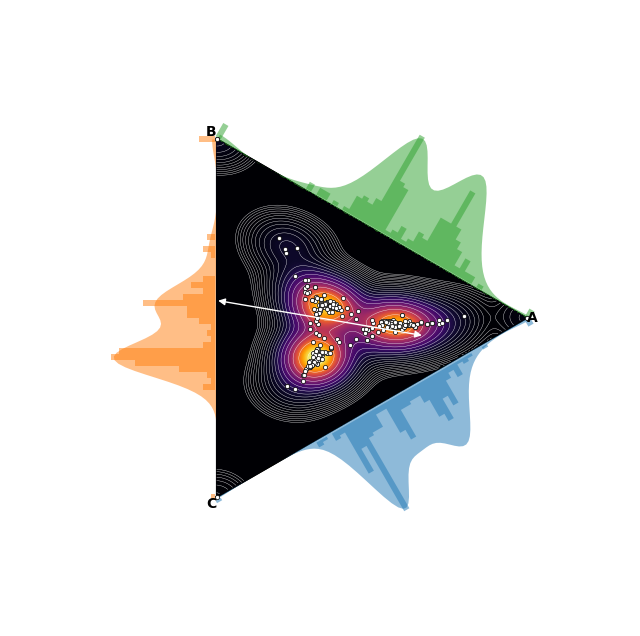

In [10]:
## These functions return figure objects, so I write _=... to avoid duplicated plots in jupyter
_=polarization_visualization_tools.vis_2d_projections(
    degroot,
    proj_type = "orthogonal",
    show_points = True,
    show_2d_kde = True,
    show_2d_hist = False,
    show_1d_kde = True,
    show_global_pca = True,
    project_close_only = True,
    show_2d_contours=True,
    poles_lbls=["A","B","C"]
)

PCA explained variance:  [0.37112678 0.62887322]
Plotting points...
Projecting 2D points to the sides of triangle...
Plotting 1D histogram...
Plotting 2D histogram...
Plotting 2D contours...
Computing 2D kernel...
Masking points outside triangle...
19959
Plotting contours...
Plotting polarization compass...


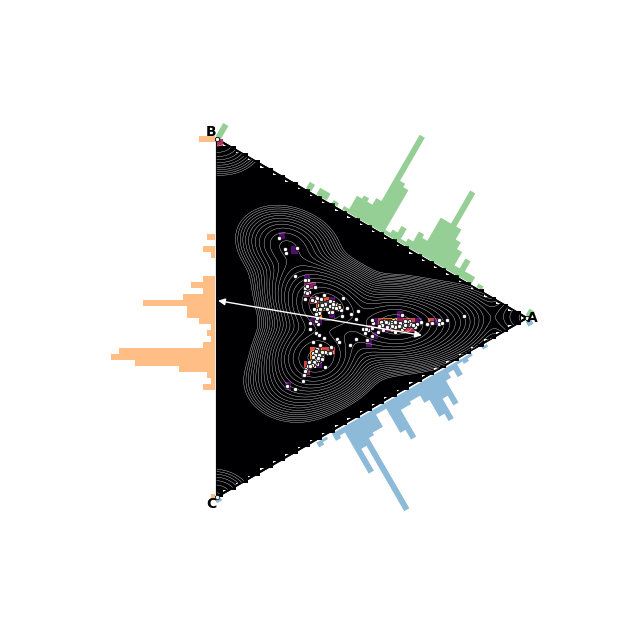

In [9]:
## Another (uglier but faster) version with a 2D histogram instead of 2D KDE
_=polarization_visualization_tools.vis_2d_projections(
    degroot,
    proj_type = "orthogonal",
    show_points = True,
    show_2d_kde = False,
    show_2d_hist = True,
    hist2d_bins = 50,
    show_1d_kde = False,
    show_global_pca = True,
    show_proj_pca = False,
    project_close_only = True,
    show_2d_contours=True,
    poles_lbls=["A","B","C"]
)

## 6.2 Adversarial projections: 1D projections along lines whose endpoints are either single poles or the barycenter of several poles (see section 5.1.3 of https://drive.upm.es/index.php/s/HHQSlJdVSyrtNBj). The directions better aligned with the principal components are marked with the % of the variance explained by the corresponding PC and their degree of alignment.

6
PCA explained variance:  [0.37112678 0.62887322]
1 vs 1
[0] [1]
[0] [2]
[1] [2]
1 vs 2
[0] [1, 2]
[1] [0, 2]
[2] [0, 1]


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

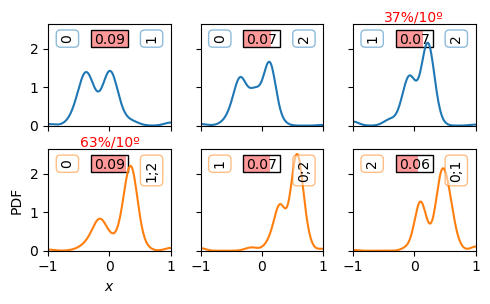

In [11]:
_= polarization_visualization_tools.vis_all_AvB_projs(
        degroot,
        project_close_only=True,
        proj_type = "orthogonal")

## 6.3 PCA projections

Computing 2D kernel...


C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\csh_samu\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


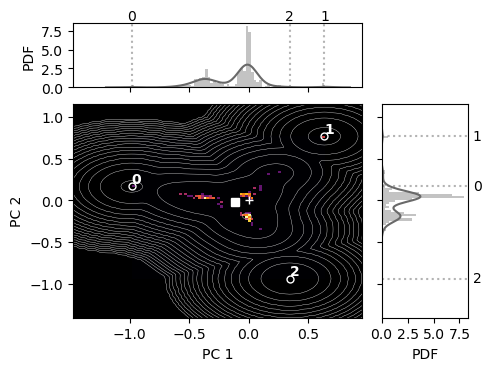

In [16]:
_=polarization_visualization_tools.vis_2d_pca(
    degroot,
    pca_to_plot = [0,1], ## Which PCA should be plotted
    dir_signs = [1,-1], ## To change direction of axis if needed
    hist2d_bins = 70,
    grid_div = 100,
    nlevels = 20,
    pole_lbls = None,
    xlim = None,
    ylim = None
)